In [1]:
from model import *
import scanpy as sc

Test. Still in development...

In [2]:
# Read in the scanpy object which was saved from scRNA_practice.ipynb
save_file = '/Users/xly/Desktop/study/python/adata_combat.h5ad'
adata_combat = sc.read_h5ad(save_file)

# Use log normalzied raw data as input to VAE
# Note that as a demo, the cells are already assigned clusters in scRNA_practice.ipynb. 
# In real applications, the clusters are not known when VAE is used for dimentionality reduction
adata_pp = adata_combat.copy()
adata_pp.X = adata_combat.layers["counts"] 
sc.pp.normalize_per_cell(adata_pp, counts_per_cell_after=1e6)
sc.pp.log1p(adata_pp)

X = adata_pp.X
X

array([[0.       , 4.984695 , 4.984695 , ..., 0.       , 4.984695 ,
        0.       ],
       [6.540169 , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [5.5964065, 0.       , 0.       , ..., 0.       , 5.5964065,
        0.       ],
       [6.0348916, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [4.9338408, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [3]:
orig_dim = X.shape[1]
vae = VAE(orig_dim)

train_step(200, vae, X)

Start of epoch 0
step 0: mean loss = 59337.2148
Start of epoch 1
step 0: mean loss = 38969.3398
Start of epoch 2
step 0: mean loss = 38154.1484
Start of epoch 3
step 0: mean loss = 37656.4102
Start of epoch 4
step 0: mean loss = 37310.5156
Start of epoch 5
step 0: mean loss = 37056.2070
Start of epoch 6
step 0: mean loss = 36866.9062
Start of epoch 7
step 0: mean loss = 36721.1680
Start of epoch 8
step 0: mean loss = 36600.0469
Start of epoch 9
step 0: mean loss = 36498.6992
Start of epoch 10
step 0: mean loss = 36417.0352
Start of epoch 11
step 0: mean loss = 36338.0273
Start of epoch 12
step 0: mean loss = 36263.9961
Start of epoch 13
step 0: mean loss = 36195.2578
Start of epoch 14
step 0: mean loss = 36135.1133
Start of epoch 15
step 0: mean loss = 36079.6641
Start of epoch 16
step 0: mean loss = 36022.7930
Start of epoch 17
step 0: mean loss = 35969.9922
Start of epoch 18
step 0: mean loss = 35922.4219
Start of epoch 19
step 0: mean loss = 35875.9258
Start of epoch 20
step 0: mean

step 0: mean loss = 48544.0664
Start of epoch 167
step 0: mean loss = 48453.8008
Start of epoch 168
step 0: mean loss = 48364.3203
Start of epoch 169
step 0: mean loss = 48276.0273
Start of epoch 170
step 0: mean loss = 48188.9375
Start of epoch 171
step 0: mean loss = 48102.6641
Start of epoch 172
step 0: mean loss = 48017.5000
Start of epoch 173
step 0: mean loss = 47933.3359
Start of epoch 174
step 0: mean loss = 47849.9648
Start of epoch 175
step 0: mean loss = 47767.6523
Start of epoch 176
step 0: mean loss = 47686.2031
Start of epoch 177
step 0: mean loss = 47605.6641
Start of epoch 178
step 0: mean loss = 47526.1055
Start of epoch 179
step 0: mean loss = 47447.3203
Start of epoch 180
step 0: mean loss = 47369.3711
Start of epoch 181
step 0: mean loss = 47292.4453
Start of epoch 182
step 0: mean loss = 47216.1641
Start of epoch 183
step 0: mean loss = 47140.8359
Start of epoch 184
step 0: mean loss = 47066.2930
Start of epoch 185
step 0: mean loss = 46992.5469
Start of epoch 186


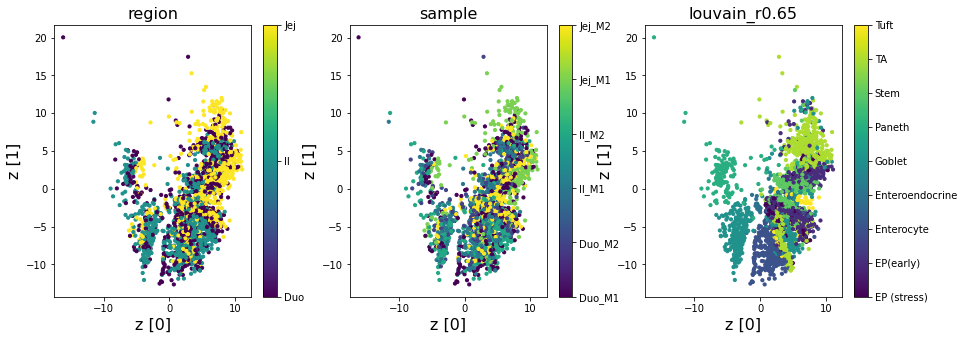

In [4]:
# without the following 2 lines, error can occur
inputs = tf.keras.Input(shape=X.shape)
vae.call(inputs)

layer_names=[layer.name for layer in vae.layers]
latent_layer = K.function(inputs=[vae.layers[0].input], outputs=[vae.get_layer(layer_names[0]).output])
latent = latent_layer([X])

x_encoded = np.array(latent[0][0][2])

le = preprocessing.LabelEncoder()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, obs in zip([0, 1, 2], ['region', 'sample', 'louvain_r0.65']):
    le.fit(list(adata_combat.obs[obs]))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    
    color = le.transform(adata_combat.obs[obs])    
    im = axes[i].scatter(x_encoded[:, 0], x_encoded[:, 1], c=color, marker='o', s=10)
    axes[i].set_xlabel('z [0]', fontsize='16')
    axes[i].set_ylabel('z [1]', fontsize='16')
    axes[i].set_title(obs, fontsize='16')
    cb = plt.colorbar(im, ax=axes[i])
    loc = np.arange(max(color) + 1)
    cb.set_ticks(loc)
    cb.set_ticklabels(list(le_name_mapping.keys()))